<a href="https://colab.research.google.com/github/JARACH-209/AI-ML_Lab/blob/master/ML_Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ML Lab 3

## 1) Simple Linear Regression 
## Dataset : Swedish Auto Insurance Dataset

In [165]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
%matplotlib inline

df = pd.read_excel("/content/insurance_dataset.xls")

df.head(3)

*** No CODEPAGE record, no encoding_override: will use 'ascii'


,X,Y
0,108,392.5
1,19,46.2
2,13,15.7


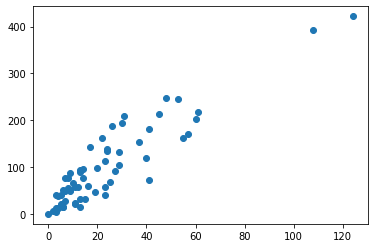

In [166]:
fig,ax = plt.subplots()
ax.scatter(df.X,df.Y)
plt.show()

Train, Test and Validation Split

In [167]:
#Train and Test set split into 80% and 20% respectively
x_train, x_rest, y_train, y_rest = train_test_split(df.X,df.Y,test_size = .4,random_state =0)

#Rest of the 40% set split into equal parts of Train and Validation set 
x_test, x_val, y_test, y_val = train_test_split(x_train,y_train,test_size = .5,random_state = 0)

#Therefore : Train = 60%, Test = 20% and Validation = 20%


In [168]:
print(len(x_train),len(y_train))
print(len(x_val),len(y_val))
print(len(x_test),len(y_test))

37 37
19 19
18 18


In [169]:
x_train = np.array(x_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)
x_val = np.array(x_val).reshape(-1,1)
y_val = np.array(y_val).reshape(-1,1)

a) Oridanry Least Squares Method

In [170]:
clf = LinearRegression(fit_intercept=True,)  #if fit intercept is false then intercept is taken as 0 otherwise it is fit as per the data
clf.fit(x_train,y_train)

val_score = clf.score(x_val,y_val)
test_score = clf.score(x_test,y_test)
train_score = clf.score(x_train,y_train)

In [171]:
print("Validation Score : ",val_score)
print("Test score : ",test_score)
print("Train score : ",train_score)
print('Coefficients: ', clf.coef_)
print('Intercept: ',clf.intercept_)

train_y_hat = clf.predict(x_train)
test_y_hat = clf.predict(x_test)
val_y_hat = clf.predict(x_val)

Validation Score :  0.9152029466665282
Test score :  0.6101251977675606
Train score :  0.8707377749067988
Coefficients:  [[3.41694874]]
Intercept:  [18.31114212]


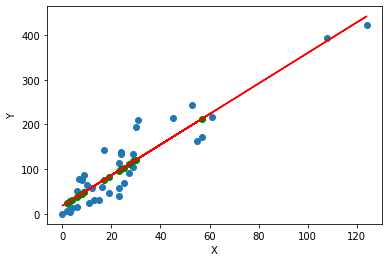

In [172]:
fig, ax = plt.subplots()
ax = plt.scatter(x_train, y_train)
ax = plt.plot(x_train, clf.coef_[0][0]*x_train + clf.intercept_[0], '-r')
fig = plt.xlabel("X")
fig = plt.ylabel("Y")
y_hat = clf.predict(x_test)
ax = plt.scatter(x_test,y_hat,color = "green")
plt.show()

In [173]:
from sklearn.metrics import r2_score

print("Train R2-score : \t\t%.2f" % r2_score(train_y_hat , y_train) )
print("Test R2-score : \t\t%.2f" % r2_score(test_y_hat , y_test) )
print("Validation R2-score : \t\t%.2f" % r2_score(val_y_hat , y_val) )
print("------------------------------------")
print("RMSE test : %.4f"%math.sqrt(mean_squared_error(y_test,test_y_hat)))
print("RMSE train : %.4f"%math.sqrt(mean_squared_error(y_train,train_y_hat)))
print("MAE test : %.4f"%mean_absolute_error(y_test,test_y_hat))
print("MAE train : %.4f"%mean_absolute_error(y_train,train_y_hat))

Train R2-score : 		0.85
Test R2-score : 		0.42
Validation R2-score : 		0.90
------------------------------------
RMSE test : 35.5350
RMSE train : 35.2963
MAE test : 30.8211
MAE train : 29.7485


b) Using Gradient Descent

**In a SDG regressor it is very important to transform the datasets otherwise output will be nonsensical**

In [174]:
scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_val = y_val.reshape(-1)

In [175]:
def grid_init():
    grid = list()
    for i in range(-8,1):
        grid += [no*(10**i) for no in range(1, 10)]
    return grid

In [176]:
def grid_search():
    best_lrate = None
    accuracy = None
    best_classifier = None
    lrate_acc = {}
    best_acc = 1e5 
    best_iter = 100

    iterations = [100,500,1000,1500,2000,5000,7500,10000,12500,15000,20000,35000,50000,100000,1000000,2500000]
    grid = grid_init()
    for iter in iterations:
        for lrate in grid:
            clf = SGDRegressor(max_iter=iter,learning_rate="constant",eta0=lrate)
            clf.fit(x_train,y_train)
            accuracy = mean_absolute_error(y_test,clf.predict(x_test))
            lrate_acc[str(accuracy)] = accuracy

            if accuracy < best_acc:
                best_acc = accuracy
                best_lrate = lrate
                best_classifier = clf
                best_iter = iter
    print(best_acc)
    return best_classifier, best_lrate, lrate_acc , iter

In [177]:
clf2, lrate, lrate_accuracy, iterations = grid_search()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linea

30.511967490509335


In [178]:
print(lrate, iterations)

5e-07 2500000


In [179]:
test_y_hat_sdg = clf2.predict(x_test)
val_y_hat_sdg = clf2.predict(x_val)
train_y_hat_sdg = clf2.predict(x_train)
train_score_sdg = clf2.score(x_train,y_train)
test_score_sdg = clf2.score(x_test,y_test)
val_score_sdg = clf2.score(x_val,y_val)

In [180]:
print("R2-score Train: \t\t%.2f" % r2_score(clf2.predict(x_train) , y_train))
print("R2-score Test: \t\t\t%.2f" % r2_score(test_y_hat_sdg , y_test))
print("R2-score Validation: \t\t%.2f" % r2_score(val_y_hat_sdg , y_val))
print("------------------------------------")
print("RMSE test : %.4f"%math.sqrt(mean_squared_error(y_test,test_y_hat_sdg)))
print("RMSE train : %.4f"%math.sqrt(mean_squared_error(y_train,train_y_hat_sdg)))
print("MAE test : %.4f"%mean_absolute_error(y_test,test_y_hat_sdg))
print("MAE train : %.4f"%mean_absolute_error(y_train,train_y_hat_sdg))

R2-score Train: 		0.71
R2-score Test: 			0.02
R2-score Validation: 		0.79
------------------------------------
RMSE test : 38.9208
RMSE train : 41.6753
MAE test : 30.5120
MAE train : 32.7868


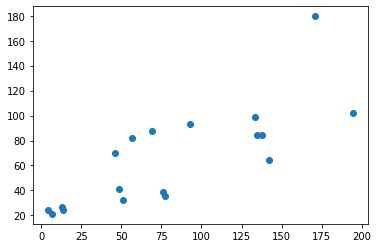

In [181]:
plt.scatter(y_test,test_y_hat_sdg)

## 2) Multiple Linear Regression using Gradient Descent
### Dataset : Boston Housing DataSet

In [182]:
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

boston_df = pd.DataFrame(load_boston().data,columns = load_boston().feature_names)

y = load_boston().target
x = load_boston().data

boston_df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [183]:
#Train and Test set split into 80% and 20% respectively
x_train, x_rest, y_train, y_rest = train_test_split(x,y,test_size = .4,random_state =0)

#Rest of the 40% set split into equal parts of Train and Validation set 
x_test, x_val, y_test, y_val = train_test_split(x_train,y_train,test_size = .5,random_state = 0)

#Therefore : Train = 60%, Test = 20% and Validation = 20%
print(len(x_train),len(y_train))
print(len(x_val),len(y_val))
print(len(x_test),len(y_test))

303 303
152 152
151 151


In [184]:
#preprocessing is necessary for SDG Regressor

scaler = preprocessing.StandardScaler().fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
x_val = scaler.transform(x_val)

y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)
y_val = y_val.reshape(-1)

In [185]:
#clf_sdg = SGDRegressor(max_iter= 50000,eta0=0.0001,learning_rate='constant')
#learning rate is default = 0.01 as constant = eta0
#clf_sdg.fit(x_train,y_train)

In [ ]:
clf2, lrate, lrate_accuracy, iterations = grid_search()

In [190]:
print(lrate,iterations)

4.9999999999999996e-06 2500000


In [ ]:
y_hat_test = clf_sdg.predict(x_test)
y_hat_val = clf_sdg.predict(x_val)
y_hat_train = clf_sdg.predict(x_train)

test_score = clf_sdg.score(x_test,y_test)
train_score = clf_sdg.score(x_train,y_train)
val_score = clf_sdg.score(x_val,y_val)

In [189]:
print("R2-score Train: \t\t%.2f" % r2_score(y_hat_train , y_train) )
print("R2-score Test: \t\t\t%.2f" % r2_score(y_hat_test , y_test) )
print("R2-score Validation: \t\t%.2f" % r2_score(y_hat_val , y_val) )
print("------------------------------------")
print("Train score : \t\t\t%.2f"%train_score)
print("Test score : \t\t\t%.2f"%test_score)
print("Validation Score : \t\t%.2f"%val_score)

print("Root Mean Squared Error : %3f"%math.sqrt(mean_squared_error(y_test,y_hat_test)))
print("MAE train : %3f"%(mean_absolute_error(y_train,y_hat_train)))
print("MAE test : %3f"%(mean_absolute_error(y_test,y_hat_test)))
print("MAE val : %3f"%(mean_absolute_error(y_val,y_hat_val)))

R2-score Train: 		0.68
R2-score Test: 			0.72
R2-score Validation: 		0.65
------------------------------------
Train score : 			0.76
Test score : 			0.77
Validation Score : 		0.75
Root Mean Squared Error : 4.362641
MAE train : 3.078017
MAE test : 3.073836
MAE val : 3.082170


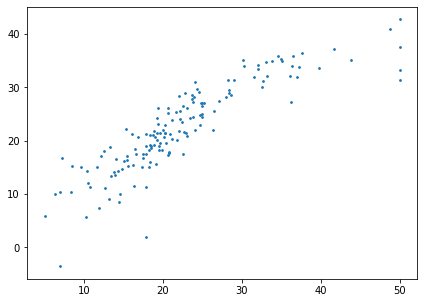

In [187]:
fig,ax = plt.subplots(figsize= (7,5))
ax.scatter(y_test,y_hat_test,s=3)